In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv('./data/fifa19_players.csv')

In [3]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


###  Найдем пропуски в данных

In [5]:
nulls = {
    'col': [],
    'null percent': [],
    'quontity': [], 
    'dtype': []
}
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    total = data[col].shape[0]
    
    if null_count:
        nulls['col'].append(col)
        nulls['null percent'].append(100 * null_count/total)
        nulls['quontity'].append('%d from %d' % (null_count, total))
        nulls['dtype'].append(str(data[col].dtype))

nulls = pd.DataFrame(nulls)
numeric = nulls[nulls['dtype'] != 'object']
numeric_cols = list(numeric['col'])

numeric

,col,null percent,quontity,dtype
2,International Reputation,0.263635,48 from 18207,float64
3,Weak Foot,0.263635,48 from 18207,float64
4,Skill Moves,0.263635,48 from 18207,float64
9,Jersey Number,0.329544,60 from 18207,float64
41,Crossing,0.263635,48 from 18207,float64
42,Finishing,0.263635,48 from 18207,float64
43,HeadingAccuracy,0.263635,48 from 18207,float64
44,ShortPassing,0.263635,48 from 18207,float64
45,Volleys,0.263635,48 from 18207,float64
46,Dribbling,0.263635,48 from 18207,float64


In [6]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator


def impute(data, cols, strategy_param):
    
    temp_data = data[cols].copy()
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp = SimpleImputer(strategy=strategy_param)
    data_imp = imp.fit_transform(temp_data)
    
    filled_data = data_imp[mask_missing_values_only]
    
    return filled_data, mask_missing_values_only

In [7]:
import warnings
warnings.filterwarnings("ignore")

for column in numeric_cols:
    filled_data, missing_values = impute(data, [column], 'mean')

    #  найдем индексы пропущенных
    missing_values = np.array(missing_values.T[0])
    missing_values_indices = [i for i, x in enumerate(missing_values) if x]

    # значение для заполнения
    fill_value = filled_data[0]

    # заполняем
    print('[%r]\nbefore: %d' % (column, data[data[column].isnull()].shape[0]))
    data[column].iloc[missing_values] = fill_value
    print('after: %d\n' % (data[data[column].isnull()].shape[0]))

['International Reputation']
before: 48
after: 0

['Weak Foot']
before: 48
after: 0

['Skill Moves']
before: 48
after: 0

['Jersey Number']
before: 60
after: 0

['Crossing']
before: 48
after: 0

['Finishing']
before: 48
after: 0

['HeadingAccuracy']
before: 48
after: 0

['ShortPassing']
before: 48
after: 0

['Volleys']
before: 48
after: 0

['Dribbling']
before: 48
after: 0

['Curve']
before: 48
after: 0

['FKAccuracy']
before: 48
after: 0

['LongPassing']
before: 48
after: 0

['BallControl']
before: 48
after: 0

['Acceleration']
before: 48
after: 0

['SprintSpeed']
before: 48
after: 0

['Agility']
before: 48
after: 0

['Reactions']
before: 48
after: 0

['Balance']
before: 48
after: 0

['ShotPower']
before: 48
after: 0

['Jumping']
before: 48
after: 0

['Stamina']
before: 48
after: 0

['Strength']
before: 48
after: 0

['LongShots']
before: 48
after: 0

['Aggression']
before: 48
after: 0

['Interceptions']
before: 48
after: 0

['Positioning']
before: 48
after: 0

['Vision']
before: 48
af

### Теперь обработаем пропуски в категориальных признаках

In [8]:
categorical = nulls[nulls['dtype'] == 'object']
categorical_cols = list(categorical['col'])

categorical

,col,null percent,quontity,dtype
0,Club,1.323667,241 from 18207,object
1,Preferred Foot,0.263635,48 from 18207,object
5,Work Rate,0.263635,48 from 18207,object
6,Body Type,0.263635,48 from 18207,object
7,Real Face,0.263635,48 from 18207,object
8,Position,0.329544,60 from 18207,object
10,Joined,8.529686,1553 from 18207,object
11,Loaned From,93.057615,16943 from 18207,object
12,Contract Valid Until,1.587302,289 from 18207,object
13,Height,0.263635,48 from 18207,object


In [9]:
data['Weight'].unique()  
# не знаю, стоит ли интерпретировать колонки Weight и Height как категоривальные, но пока оставлю как есть

array(['159lbs', '183lbs', '150lbs', '168lbs', '154lbs', '163lbs',
       '146lbs', '190lbs', '181lbs', '192lbs', '176lbs', '172lbs',
       '148lbs', '165lbs', '196lbs', '161lbs', '187lbs', '212lbs',
       '170lbs', '203lbs', '157lbs', '185lbs', '130lbs', '174lbs',
       '207lbs', '134lbs', '141lbs', '152lbs', '179lbs', '132lbs',
       '201lbs', '198lbs', '209lbs', '214lbs', '143lbs', '205lbs',
       '137lbs', '194lbs', '216lbs', '139lbs', '220lbs', '126lbs',
       '218lbs', '123lbs', '227lbs', '128lbs', '223lbs', '225lbs',
       '121lbs', '115lbs', '117lbs', '236lbs', '229lbs', '243lbs', nan,
       '110lbs', '119lbs', '234lbs'], dtype=object)

### Уберем колонку Loaned From из-за высоко процента пропуска

In [10]:
data = data.drop(['Loaned From'], axis=1)
# из списка категориальных колонок уберем вручную
categorical_cols.remove('Loaned From')
categorical = categorical[categorical['col'] != 'Loaned From']
categorical

,col,null percent,quontity,dtype
0,Club,1.323667,241 from 18207,object
1,Preferred Foot,0.263635,48 from 18207,object
5,Work Rate,0.263635,48 from 18207,object
6,Body Type,0.263635,48 from 18207,object
7,Real Face,0.263635,48 from 18207,object
8,Position,0.329544,60 from 18207,object
10,Joined,8.529686,1553 from 18207,object
12,Contract Valid Until,1.587302,289 from 18207,object
13,Height,0.263635,48 from 18207,object
14,Weight,0.263635,48 from 18207,object


In [11]:
import warnings
warnings.filterwarnings("ignore")

for column in categorical_cols:
    filled_data, missing_values = impute(data, [column], 'most_frequent')

    #  найдем индексы пропущенных
    missing_values = np.array(missing_values.T[0])
    missing_values_indices = [i for i, x in enumerate(missing_values) if x]

    # значение для заполнения
    fill_value = filled_data[0]

    # заполняем
    print('[%r]\nbefore: %d' % (column, data[data[column].isnull()].shape[0]))
    data[column].iloc[missing_values] = fill_value
    print('after: %d\n' % (data[data[column].isnull()].shape[0]))

['Club']
before: 241
after: 0

['Preferred Foot']
before: 48
after: 0

['Work Rate']
before: 48
after: 0

['Body Type']
before: 48
after: 0

['Real Face']
before: 48
after: 0

['Position']
before: 60
after: 0

['Joined']
before: 1553
after: 0

['Contract Valid Until']
before: 289
after: 0

['Height']
before: 48
after: 0

['Weight']
before: 48
after: 0

['LS']
before: 2085
after: 0

['ST']
before: 2085
after: 0

['RS']
before: 2085
after: 0

['LW']
before: 2085
after: 0

['LF']
before: 2085
after: 0

['CF']
before: 2085
after: 0

['RF']
before: 2085
after: 0

['RW']
before: 2085
after: 0

['LAM']
before: 2085
after: 0

['CAM']
before: 2085
after: 0

['RAM']
before: 2085
after: 0

['LM']
before: 2085
after: 0

['LCM']
before: 2085
after: 0

['CM']
before: 2085
after: 0

['RCM']
before: 2085
after: 0

['RM']
before: 2085
after: 0

['LWB']
before: 2085
after: 0

['LDM']
before: 2085
after: 0

['CDM']
before: 2085
after: 0

['RDM']
before: 2085
after: 0

['RWB']
before: 2085
after: 0

['LB'

### Почему-то не смог сделать способом ниже :((

In [12]:

# Импьютация наиболее частыми значениями
# imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# data_club_imp = imp_cat.fit_transform([data['Club']])

In [13]:
# club = pd.Series(data_club_imp[0])
# for row in club.isnull():
#         if row:
#             print('Nan')

In [14]:
# data = data.drop('Club', axis=1)
# data['Club'] = club

In [15]:
# data[data['Club'].isnull()].shape[0]

### Кодируем категориальные признаки

In [16]:
data.shape

(18207, 88)

In [17]:
# думаю, такой вариант нам не подходит из-за слишком большого количества признаков
# data_one_hot = pd.get_dummies(data)
# data_one_hot.shape -------- (18207, 43189)

In [18]:
# бинарные признаки
binary_cols = []
for col in categorical_cols:
    if len(data[col].unique()) == 2:
        binary_cols.append(col)
        
binary_cols

['Preferred Foot', 'Real Face']

In [19]:
from sklearn.preprocessing import LabelEncoder
nonbinary_cols = [col for col in categorical_cols if col not in binary_cols]

In [20]:
le = LabelEncoder()
data_cat_enc_le = le.fit_transform(data[nonbinary_cols[0]])

In [21]:
le.inverse_transform([50, 40])

array(['Argentinos Juniors', 'Al Taawoun'], dtype=object)

In [22]:
le_for_col = {}
for col in nonbinary_cols:
    le_for_col[col] = LabelEncoder()
    data_cat_enc_le = le_for_col[col].fit_transform(data[col])
    
    data_cat_series = pd.Series(data_cat_enc_le)
    data[col] = data_cat_series
    print(data[col])

0        212
1        326
2        435
3        375
4        374
5        134
6        470
7        212
8        470
9         61
10       214
11       470
12        61
13       374
14       134
15       326
16       583
17        61
18       212
19       470
20       212
21       435
22       214
23       374
24       326
25       435
26       363
27       470
28       214
29       398
        ... 
18177     80
18178    177
18179    407
18180    556
18181     92
18182     63
18183    122
18184    362
18185    188
18186     73
18187    547
18188    406
18189    547
18190    122
18191    122
18192    122
18193    599
18194    353
18195    629
18196    327
18197    160
18198    102
18199    607
18200    571
18201    629
18202    165
18203    587
18204    122
18205    586
18206    586
Name: Club, Length: 18207, dtype: int64
0        8
1        1
2        2
3        8
4        0
5        2
6        0
7        2
8        2
9        8
10       2
11       8
12       6
13       2
14       6
15

Name: RCM, Length: 18207, dtype: int64
0        99
1        97
2        97
3        45
4        97
5        98
6        96
7        94
8        68
9        45
10       87
11       89
12       50
13       95
14       83
15       96
16       87
17       96
18       45
19       45
20       76
21       83
22       45
23       91
24       36
25       96
26       96
27       66
28       91
29       96
         ..
18177    17
18178    45
18179     6
18180    45
18181    17
18182    17
18183    45
18184    19
18185    20
18186    20
18187    20
18188    24
18189    21
18190    17
18191    16
18192    20
18193    12
18194    45
18195    20
18196    17
18197    24
18198    45
18199    19
18200    14
18201     3
18202    17
18203    11
18204    17
18205    20
18206    20
Name: RM, Length: 18207, dtype: int64
0        53
1        56
2        56
3        47
4        81
5        58
6        91
7        65
8        89
9        47
10       48
11       85
12       79
13       64
14       94
15       50

In [23]:
# как мы видим, теперь значения в числовом виде
data.loc[:, nonbinary_cols]

,Club,Work Rate,Body Type,Position,Joined,Contract Valid Until,Height,Weight,LS,ST,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
0,212,8,4,21,774,3,8,21,91,91,...,48,48,48,53,47,28,28,28,47,293
1,326,1,1,26,794,4,13,32,92,92,...,49,49,49,56,52,42,42,42,52,82
2,435,2,5,14,247,4,10,17,86,86,...,47,47,47,56,50,29,29,29,50,294
3,375,8,3,5,781,2,15,25,40,40,...,50,50,50,47,51,61,61,61,51,104
4,374,0,6,19,253,5,2,19,83,83,...,82,82,82,81,77,69,69,69,77,232
5,134,2,6,11,782,2,9,23,85,85,...,53,53,53,58,50,33,33,33,50,187
6,470,0,3,19,103,2,9,15,73,73,...,90,90,90,91,89,79,79,79,89,102
7,212,2,6,23,799,3,11,35,90,90,...,64,64,64,65,63,63,63,63,63,168
8,470,2,6,18,96,2,11,31,65,65,...,95,95,95,89,97,107,107,107,97,22
9,61,8,6,5,834,3,13,36,40,40,...,50,50,50,47,51,61,61,61,51,121


## Теперь отмасштабируем данные

In [24]:
numeric_cols

['International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Jersey Number',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes']

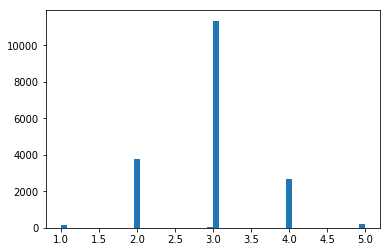

In [25]:
plt.hist(data['Weak Foot'], 50)
plt.show()

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Weak Foot']])

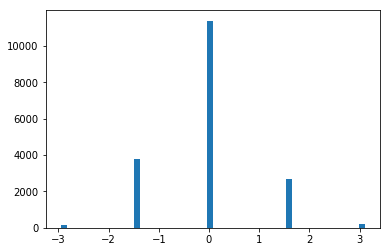

In [27]:
plt.hist(scaled_data, 50)
plt.show()

### Автоматизируем

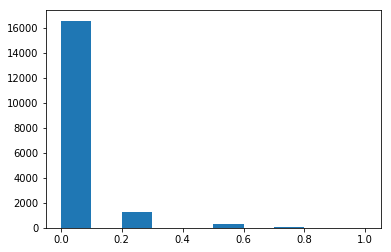

In [36]:
for column in numeric_cols:
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data[[column]])
    scaled_data = list(map(lambda x: x[0], scaled_data))
    data = data.drop(column, axis=1)
    data[column] = pd.Series(scaled_data)
    if column == 'International Reputation':
        plt.hist(pd.Series(scaled_data), 10)
        plt.show()

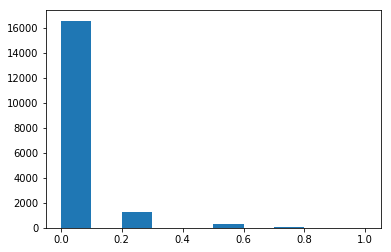

In [37]:
plt.hist(data['International Reputation'], 10)
plt.show()